[Reference](https://blog.devgenius.io/time-series-with-python-data-operations-f88b2e791aba)

In [1]:
import datetime

t = datetime.datetime.now()
print(f"type: {type(t)} and t: {t}")

type: <class 'datetime.datetime'> and t: 2022-12-28 08:58:04.349681


In [2]:
string = '2022-01-01 11:30:09'
t = datetime.datetime.strptime(string, "%Y-%m-%d %H:%M:%S")
print(f"type: {type(t)} and t: {t}")

type: <class 'datetime.datetime'> and t: 2022-01-01 11:30:09


In [3]:
t = datetime.datetime.now()
t_string = t.strftime("%m/%d/%Y, %H:%M:%S")
print(t)
t_string = t.strftime("%b/%d/%Y, %H:%M:%S")
print(t)

2022-12-28 08:58:24.893215
2022-12-28 08:58:24.893215


In [4]:
#convert datetime to unix time
import time
from datetime import datetime

t = datetime.now()
unix_t = int(time.mktime(t.timetuple()))
#1672055277

#convert unix time to datetime
unix_t = 1672055277
t = datetime.fromtimestamp(unix_t)
#2022-12-26 14:47:57

In [5]:
from dateutil import parser
date = parser.parse("29th of October, 1923")
#datetime.datetime(1923, 10, 29, 0, 0)

In [7]:
import pandas as pd

t = pd.to_datetime("29/10/1923", dayfirst=True)
#Timestamp('1923-10-29 00:00:00')

t = pd.Timestamp('2019-01-01', tz = 'Europe/Berlin')
#Timestamp('2019-01-01 00:00:00+0100', tz='Europe/Berlin')

t = pd.to_datetime(["04/23/1920", "10/29/1923"])
#DatetimeIndex(['1920-04-23', '1923-10-29'], dtype='datetime64[ns]', freq=None)

In [8]:
t = pd.to_datetime(["04/23/1920", "10/29/1923"])
period = t.to_period("D")

In [9]:
delta = pd.TimedeltaIndex(data =['1 days 03:00:00', 
                                '2 days 09:05:01.000030'])

delta

TimedeltaIndex(['1 days 03:00:00', '2 days 09:05:01.000030'], dtype='timedelta64[ns]', freq=None)

In [11]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.1 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 110 kB 50.9 MB/s 
     |████████████████████████████████| 4.0 MB 58.9 MB/s 
     |████████████████████████████████| 128 kB 74.8 MB/s 
     |████████████████████████████████| 112 kB 66.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [12]:
#get google stock price data
import yfinance as yf
start_date = '2020-01-01'
end_date = '2023-01-01'
ticker = 'GOOGL'
df = yf.download(ticker, start_date, end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,67.420502,68.433998,67.324501,68.433998,68.433998,27278000
2020-01-03,67.400002,68.687500,67.365997,68.075996,68.075996,23408000
2020-01-06,67.581497,69.916000,67.550003,69.890503,69.890503,46768000
2020-01-07,70.023003,70.175003,69.578003,69.755501,69.755501,34330000
2020-01-08,69.740997,70.592499,69.631500,70.251999,70.251999,35314000


In [13]:
#subtract that day's value from the previous day
df["Diff_Close"] = df["Close"].diff()
#Subtract that day's value from the day's value 2 days ago
df["Diff_Close_2Days"] = df["Close"].diff(periods=2)

In [14]:
df["Volume_Cumulative"] = df["Volume"].cumsum()

In [15]:
df["Close_Rolling_14"] = df["Close"].rolling(14).mean()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Diff_Close,Diff_Close_2Days,Volume_Cumulative,Close_Rolling_14
Date,,,,,,,,,,
2022-12-20,88.110001,89.180000,87.440002,89.019997,89.019997,23453800,0.579994,-1.240005,26361860000,94.425715
2022-12-21,89.080002,90.220001,88.320000,89.580002,89.580002,24745600,0.560005,1.139999,26386605600,93.610715
2022-12-22,88.160004,88.540001,86.320000,87.760002,87.760002,27658300,-1.820000,-1.259995,26414263900,92.705001
2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,22994400,1.470001,-0.349998,26437258300,91.972858
2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20076900,-1.840004,-0.370003,26457335200,91.287858


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


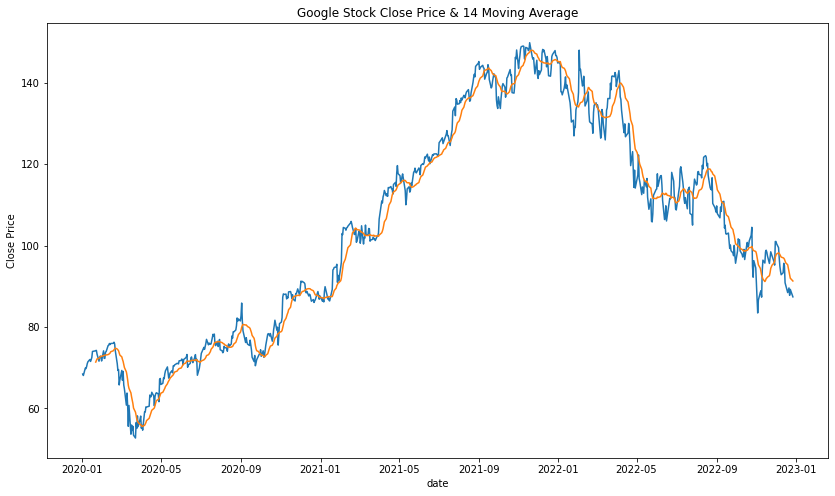

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (14, 8))
ax = sns.lineplot(df.index,df["Close"])
ax = sns.lineplot(df.index,df["Close_Rolling_14"])
ax.set(xlabel='date', ylabel='Close Price', title='Google Stock Close Price & 14 Moving Average')
plt.show()

In [17]:
s = pd.Series([1, 2, 3, 4, 5])

#the rolling window will be centered on each observation
rolling_mean = s.rolling(window=3, center=True).mean()

# the rolling window will not be centered, 
#and will instead be anchored to the left side of the window
rolling_mean = s.rolling(window=3, center=False).mean()

In [18]:
#shift the data
df_shifted = df.shift(5,axis=0)
df_shifted.head(10)

#shift the indexes
df_tshifted = df.tshift(periods = 4, freq = 'D')
df_tshifted.head(10)

<ipython-input-18-437fd330fa7c>:6: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df_tshifted = df.tshift(periods = 4, freq = 'D')


,Open,High,Low,Close,Adj Close,Volume,Diff_Close,Diff_Close_2Days,Volume_Cumulative,Close_Rolling_14
Date,,,,,,,,,,
2020-01-06,67.420502,68.433998,67.324501,68.433998,68.433998,27278000,NaN,NaN,27278000,NaN
2020-01-07,67.400002,68.687500,67.365997,68.075996,68.075996,23408000,-0.358002,NaN,50686000,NaN
2020-01-10,67.581497,69.916000,67.550003,69.890503,69.890503,46768000,1.814507,1.456505,97454000,NaN
2020-01-11,70.023003,70.175003,69.578003,69.755501,69.755501,34330000,-0.135002,1.679504,131784000,NaN
2020-01-12,69.740997,70.592499,69.631500,70.251999,70.251999,35314000,0.496498,0.361496,167098000,NaN
2020-01-13,71.096497,71.433998,70.510498,70.989502,70.989502,33200000,0.737503,1.234001,200298000,NaN
2020-01-14,71.473503,71.747002,70.980003,71.447998,71.447998,26258000,0.458496,1.195999,226556000,NaN
2020-01-17,71.762497,72.073997,71.268501,72.001503,72.001503,30730000,0.553505,1.012001,257286000,NaN
2020-01-18,72.000000,72.131500,71.388496,71.529503,71.529503,26076000,-0.472000,0.081505,283362000,NaN


In [20]:
# df["Period"] = df["Date"].dt.to_period('W')

In [21]:
monthly_data = df.asfreq('M', method='ffill')

In [23]:
#down sample
monthly_data = df.resample('M').mean()
#up sample
minute_data = df.resample('T').ffill()

In [24]:
df["PCT"] = df["Close"].pct_change(periods=2)
print(df["PCT"])

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06    0.021283
2020-01-07    0.024671
2020-01-08    0.005172
                ...   
2022-12-20   -0.013738
2022-12-21    0.012890
2022-12-22   -0.014154
2022-12-23   -0.003907
2022-12-27   -0.004216
Name: PCT, Length: 753, dtype: float64
